In [8]:
# \\DISC
cwd = "..\\..\\"
cwd_Images_Raw = cwd + "\\Sentinel-2 Images Raw"
cwd_Images_Processed = cwd + "\\Sentinel-2 Images Processed"

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
# Read .csv
df = pd.read_excel(cwd + "//Flox_sites_table_final_PFT_correct.xlsx", sheet_name="With-forest")
df.head()

,Number,Site code,Site name,Country,LAT,LON,Main ecosystem,FLOX Active,Homogeneity test passed,Network,Link
0,1,AT-Mmg,Mieming,Austria,47.3167,10.9702,Evergreen Forest,Yes,Yes,NaN,https://www.europe-fluxdata.eu/home/site-detai...
1,2,BE-Bra,Brasschaat,Belgium,51.3077,4.5198,Evergreen Forest,Yes,Yes,ICOS,https://meta.icos-cp.eu/resources/stations/ES_...
2,3,BE-WAL,BE - WAL,Belgium,50.5516,4.7461,Crop,No,No,NaN,https://essd.copernicus.org/articles/16/1283/2...
3,4,NaN,Tapajos KM67,Brasil,-2.8567,-54.9589,Evergreen Forest,Planned,Yes,NaN,NaN
4,5,CANADA-ONT,Ontario,Canada,42.7102,-80.3573,Evergreen Forest,Yes,Yes,NaN,NaN


In [16]:
df_Group = df.groupby(['Main ecosystem','Homogeneity test passed']).count()
df_Group = df_Group.reset_index()
df_Group

,Main ecosystem,Homogeneity test passed,Number,Site code,Site name,Country,LAT,LON,FLOX Active,Network,Link
0,Crop,No,17,17,17,17,17,17,17,1,2
1,Crop,Yes,3,3,3,3,3,3,3,1,1
2,Deciduous Forest,No,3,3,3,3,3,3,3,1,1
3,Deciduous Forest,Yes,7,7,7,7,7,7,7,1,2
4,Evergreen Forest,No,1,1,1,1,1,1,1,1,1
5,Evergreen Forest,Yes,15,14,15,15,15,15,15,4,5
6,Grasslands,No,1,1,1,1,1,1,1,0,0
7,Grasslands,Yes,2,2,2,2,2,2,2,1,1
8,Savannah,No,1,1,1,1,1,1,1,0,0
9,Savannah,Yes,3,3,3,3,3,3,3,0,0


In [20]:
list_Eco = list(df_Group['Main ecosystem'].unique())

In [33]:
# Get the counts of passed ecosystems
list_Value_Passed = []
for eco in list_Eco:
    temp_Array = df_Group[(df_Group['Homogeneity test passed'] == 'Yes') & (df_Group['Main ecosystem'] == eco)]['Number'].values
    if temp_Array.size:
        temp_Value = temp_Array[0]
        list_Value_Passed.append(temp_Value)
    else:
        list_Value_Passed.append(0)
list_Value_Passed

[3, 7, 15, 2, 3, 2, 0]

In [34]:
# Get the counts of failed ecosystems
list_Value_Failed = []
for eco in list_Eco:
    temp_Array = df_Group[(df_Group['Homogeneity test passed'] == 'No') & (df_Group['Main ecosystem'] == eco)]['Number'].values
    if temp_Array.size:
        temp_Value = temp_Array[0]
        list_Value_Failed.append(temp_Value)
    else:
        list_Value_Failed.append(0)
list_Value_Failed

[17, 3, 1, 1, 1, 0, 1]

In [ ]:
# Create a list to annotate the index where there is a 0
list_ZeroNote = []
for i in len(list_Value_Passed):
    if list_Value_Passed[i] == 0:

Text(0, 0.5, 'Number of sites')

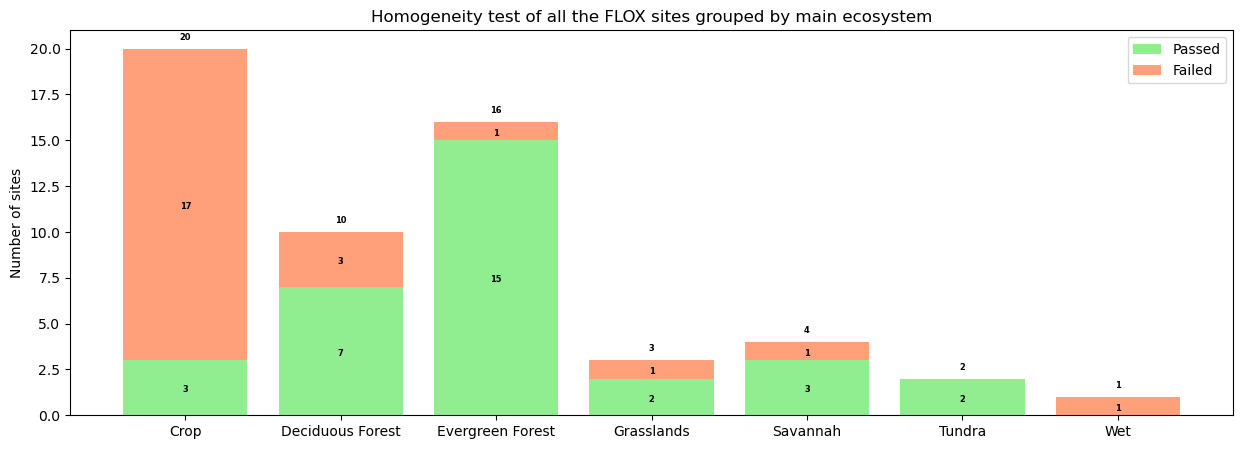

In [38]:
# Bar chart
groups = list_Eco
value_Passed = list_Value_Passed
value_Failed = list_Value_Failed
fig, ax = plt.subplots(figsize = (15,5))
plt.title("Homogeneity test of all the FLOX sites grouped by main ecosystem")
ax.bar(groups, value_Passed, label = 'Passed', color = 'lightgreen')
ax.bar(groups, value_Failed, bottom = value_Passed, label = 'Failed', color = 'lightsalmon')

i = 0
for bar in ax.patches:
  if bar.get_height() != 0:
    ax.text(bar.get_x() + bar.get_width() / 2,
          bar.get_height() / 2 + bar.get_y() - 0.25,
          round(bar.get_height()), ha = 'center',
          color = 'black', weight = 'bold', size = 6)
  
  # Sum of values
total_values = np.add(value_Passed, value_Failed)
# Total values labels
for i, total in enumerate(total_values):
  ax.text(i, total + 0.5, round(total),
          ha = 'center', weight = 'bold', color = 'black', size = 6)

ax.legend()
ax.set_ylabel('Number of sites')

In [14]:
[1,2,3] + [1,2,3]

[1, 2, 3, 1, 2, 3]